In [135]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
from splinter import Browser
from bs4 import BeautifulSoup


In [25]:
tree_data_2005 = pd.read_json('https://data.cityofnewyork.us/resource/29bw-z7pj.json')

In [47]:
tree_data_2005

,tree_id,cen_year,tree_dbh,address,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,...,objectid_1,census_tract,bin,bbl,location_1,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,592373,2005,6,1139 57 STREET,Front,Sidewalk Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",...,0,216.0,3140038.0,3.056890e+09,"{'latitude': '40.63265321', 'longitude': '-74....",17621.0,2.0,2.0,18.0,39.0
1,592374,2005,6,2220 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,1,706.0,3238037.0,3.084440e+09,"{'latitude': '40.62008375', 'longitude': '-73....",13825.0,5.0,2.0,8.0,38.0
2,592375,2005,13,2360 BERGEN AVENUE,Front,Continuous Pit,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",...,2,706.0,3238299.0,3.084530e+09,"{'latitude': '40.61799567', 'longitude': '-73....",13825.0,5.0,2.0,8.0,38.0
3,592376,2005,13,2254 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,3,706.0,3238045.0,3.084440e+09,"{'latitude': '40.6196936', 'longitude': '-73.9...",13825.0,5.0,2.0,8.0,38.0
4,592377,2005,15,2332 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,4,706.0,3238294.0,3.084530e+09,"{'latitude': '40.61832261', 'longitude': '-73....",13825.0,5.0,2.0,8.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,593337,2005,11,175 WEST 90 STREET,Front,Sidewalk Pit,Level,Good,ACER RUBRUM,"MAPLE, RED",...,964,177.0,1032489.0,1.012210e+09,"{'latitude': '40.7898698', 'longitude': '-73.9...",12421.0,20.0,4.0,19.0,15.0
996,593338,2005,16,133 WEST 90 STREET,Front,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,965,177.0,1077129.0,1.012210e+09,"{'latitude': '40.78951277', 'longitude': '-73....",12421.0,20.0,4.0,19.0,15.0
997,593339,2005,12,117 WEST 90 STREET,Front,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,966,177.0,1077128.0,1.012210e+09,"{'latitude': '40.78937546', 'longitude': '-73....",12421.0,20.0,4.0,19.0,15.0
998,593340,2005,12,117 WEST 90 STREET,Front,Sidewalk Pit,Level,Poor,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,967,177.0,1077128.0,1.012210e+09,"{'latitude': '40.78937546', 'longitude': '-73....",12421.0,20.0,4.0,19.0,15.0


In [38]:
tree_data_2005.rename(columns={"objectid":"tree_id"}, inplace=True)

In [117]:
df_location = json_normalize(tree_data_2005['location_1'])
tree_data_2005[['latitude', 'longitude']] = df_location[['latitude', 'longitude']]

In [41]:
tree_data_2015 = pd.read_json('https://data.cityofnewyork.us/resource/uvpi-gqnh.json')

In [42]:
tree_data_2015

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
0,180683,348711,2015-08-27,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,197824,413596,2015-09-02,2,0,OnCurb,Dead,NaN,NaN,NaN,...,5017007,New York,40.562595,-74.182098,9.336536e+05,144297.4109,51.0,17007.0,5127346.0,5.057250e+09
996,191374,415497,2015-08-31,1,0,OnCurb,Dead,NaN,NaN,NaN,...,5013800,New York,40.569294,-74.129443,9.482876e+05,146712.0501,50.0,138.0,5059600.0,5.043490e+09
997,177355,224301,2015-08-26,10,0,OnCurb,Alive,Poor,Acer platanoides,Norway maple,...,3006300,New York,40.685053,-74.000152,9.842078e+05,188859.6391,39.0,63.0,3004106.0,3.003310e+09
998,195035,229940,2015-09-01,25,0,OnCurb,Alive,Good,Acer platanoides,Norway maple,...,3076200,New York,40.624792,-73.957517,9.960431e+05,166907.8237,44.0,762.0,3180150.0,3.067200e+09


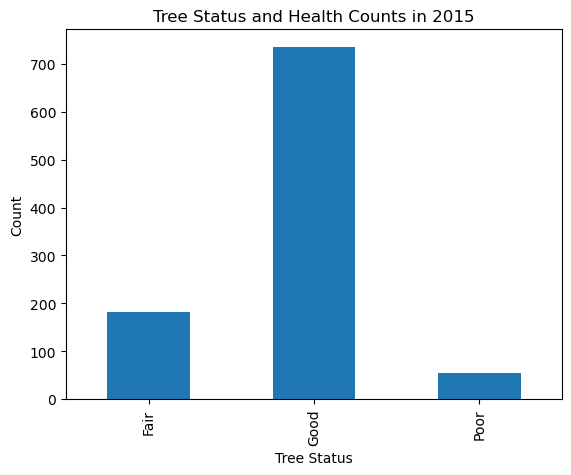

In [33]:
status_health_counts = tree_data_2015.groupby(['health']).size()
status_health_counts.plot(kind='bar', stacked=True)
plt.title('Tree Status and Health Counts in 2015')
plt.xlabel('Tree Status')
plt.ylabel('Count')
plt.show()

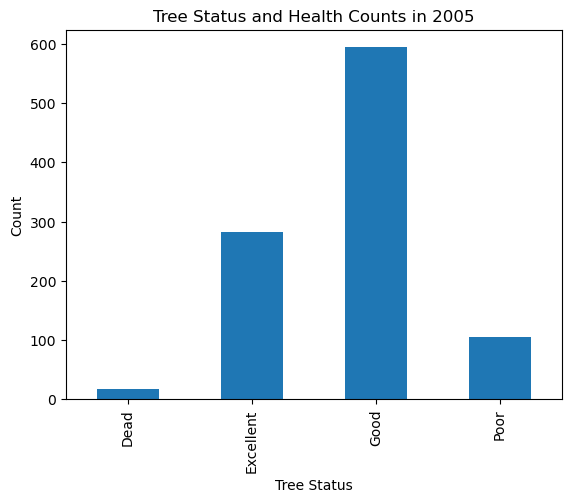

In [36]:
status_health_counts = tree_data_2005.groupby(['status']).size()
status_health_counts.plot(kind='bar', stacked=True)
plt.title('Tree Status and Health Counts in 2005')
plt.xlabel('Tree Status')
plt.ylabel('Count')
plt.show()

In [54]:
health_distribution = tree_data_2015.groupby(['boroname', 'health']).size().unstack()


In [55]:
health_distribution

health,Fair,Good,Poor
boroname,,,
Bronx,16.0,65.0,6.0
Brooklyn,39.0,254.0,17.0
Manhattan,32.0,161.0,5.0
Queens,76.0,194.0,26.0
Staten Island,19.0,61.0,NaN


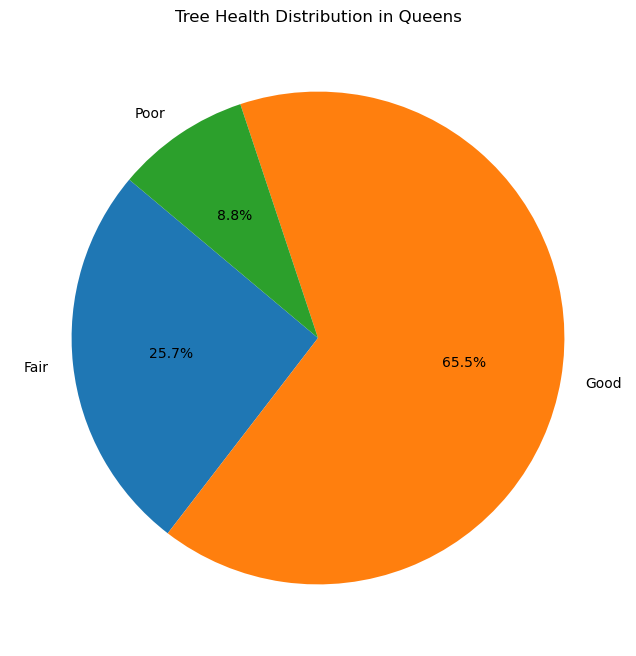

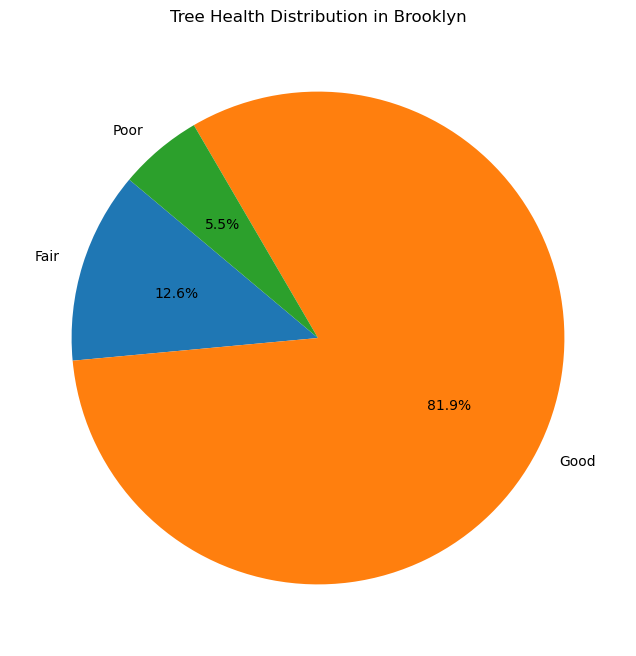

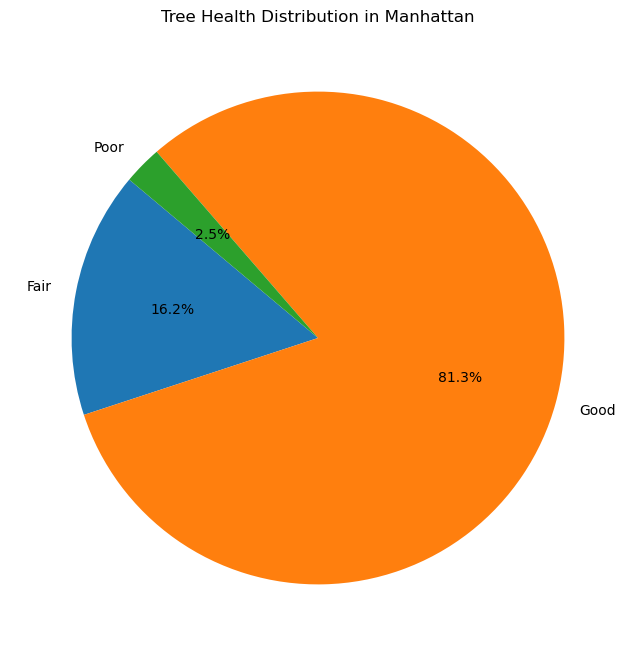

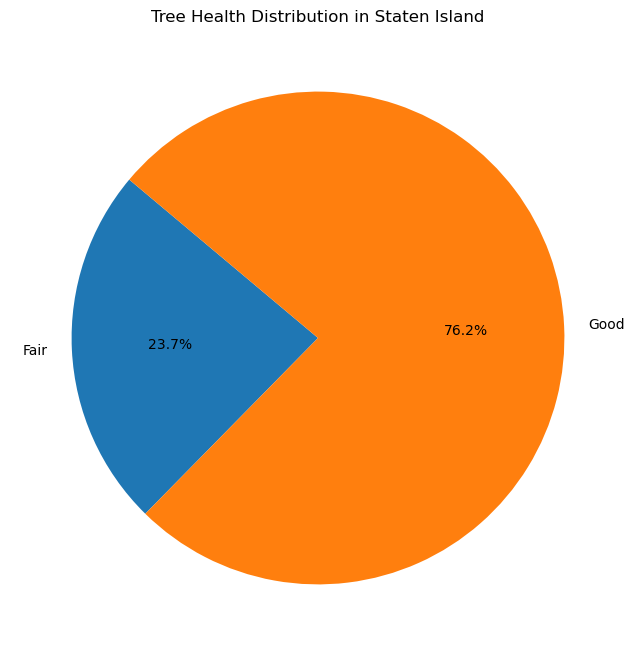

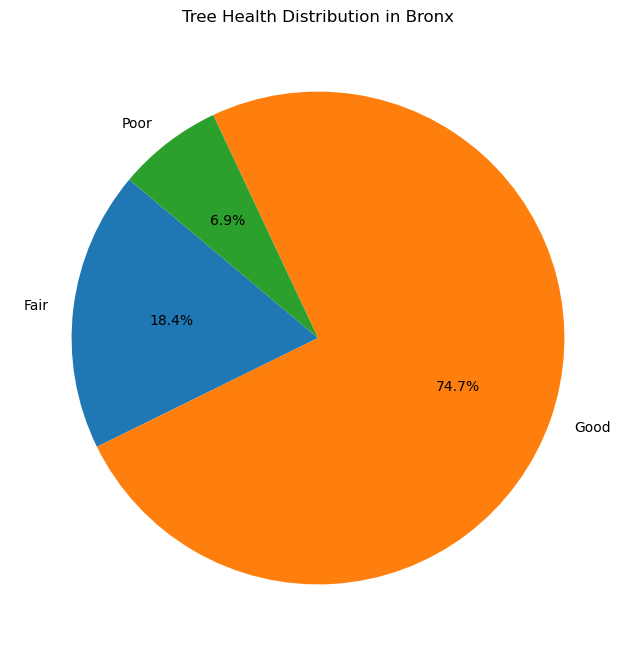

In [57]:
for borough in tree_data_2015['boroname'].unique():
    # Filter data for the specific borough
    borough_data = health_distribution.loc[borough].dropna()

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(borough_data, labels=borough_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Tree Health Distribution in {borough}")
    plt.show()

In [ ]:
#compare with air quality -- trying to find a connection

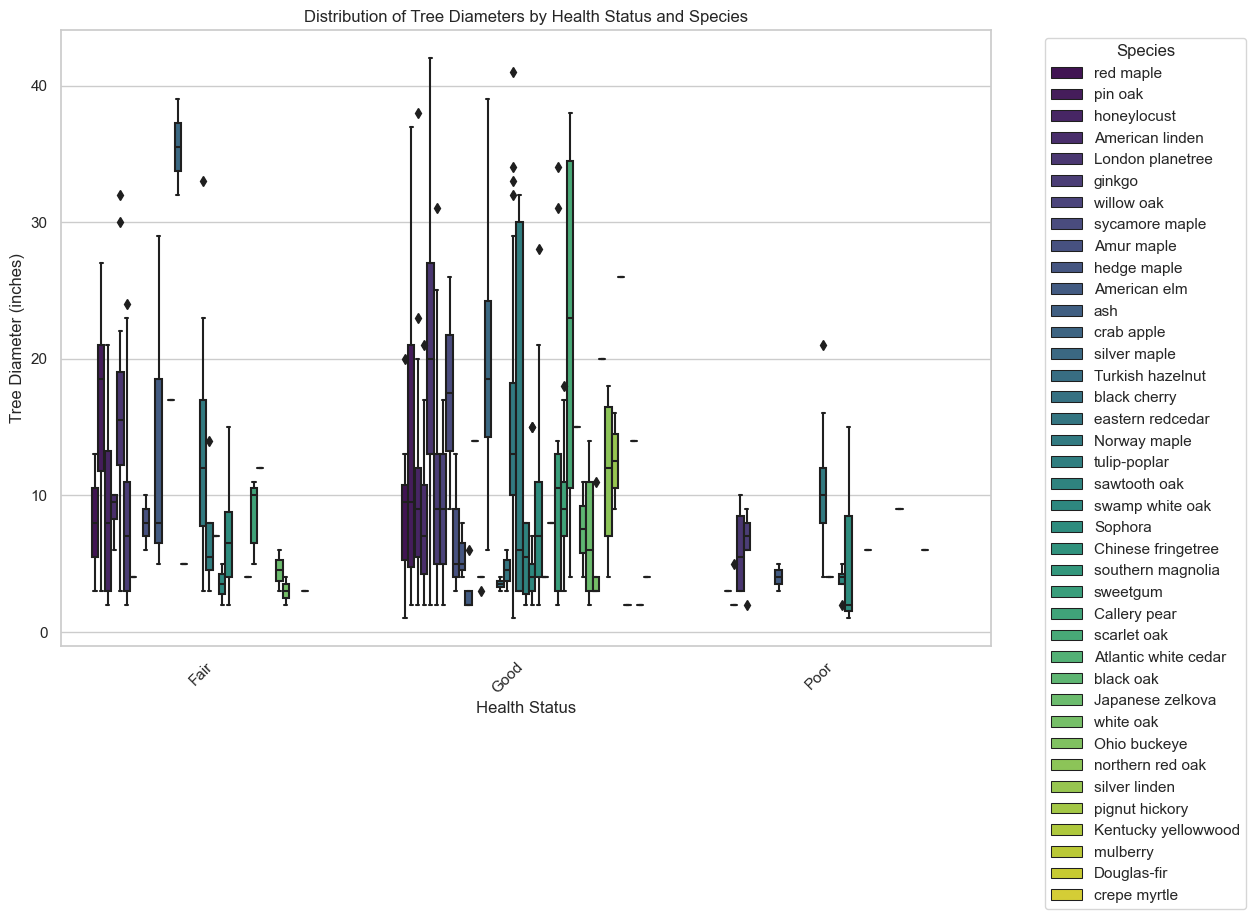

In [59]:
filtered_data = tree_data_2015.dropna(subset=['tree_dbh'])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='health', y='tree_dbh', hue='spc_common', data=filtered_data, palette='viridis')
plt.title('Distribution of Tree Diameters by Health Status and Species')
plt.xlabel('Health Status')
plt.ylabel('Tree Diameter (inches)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

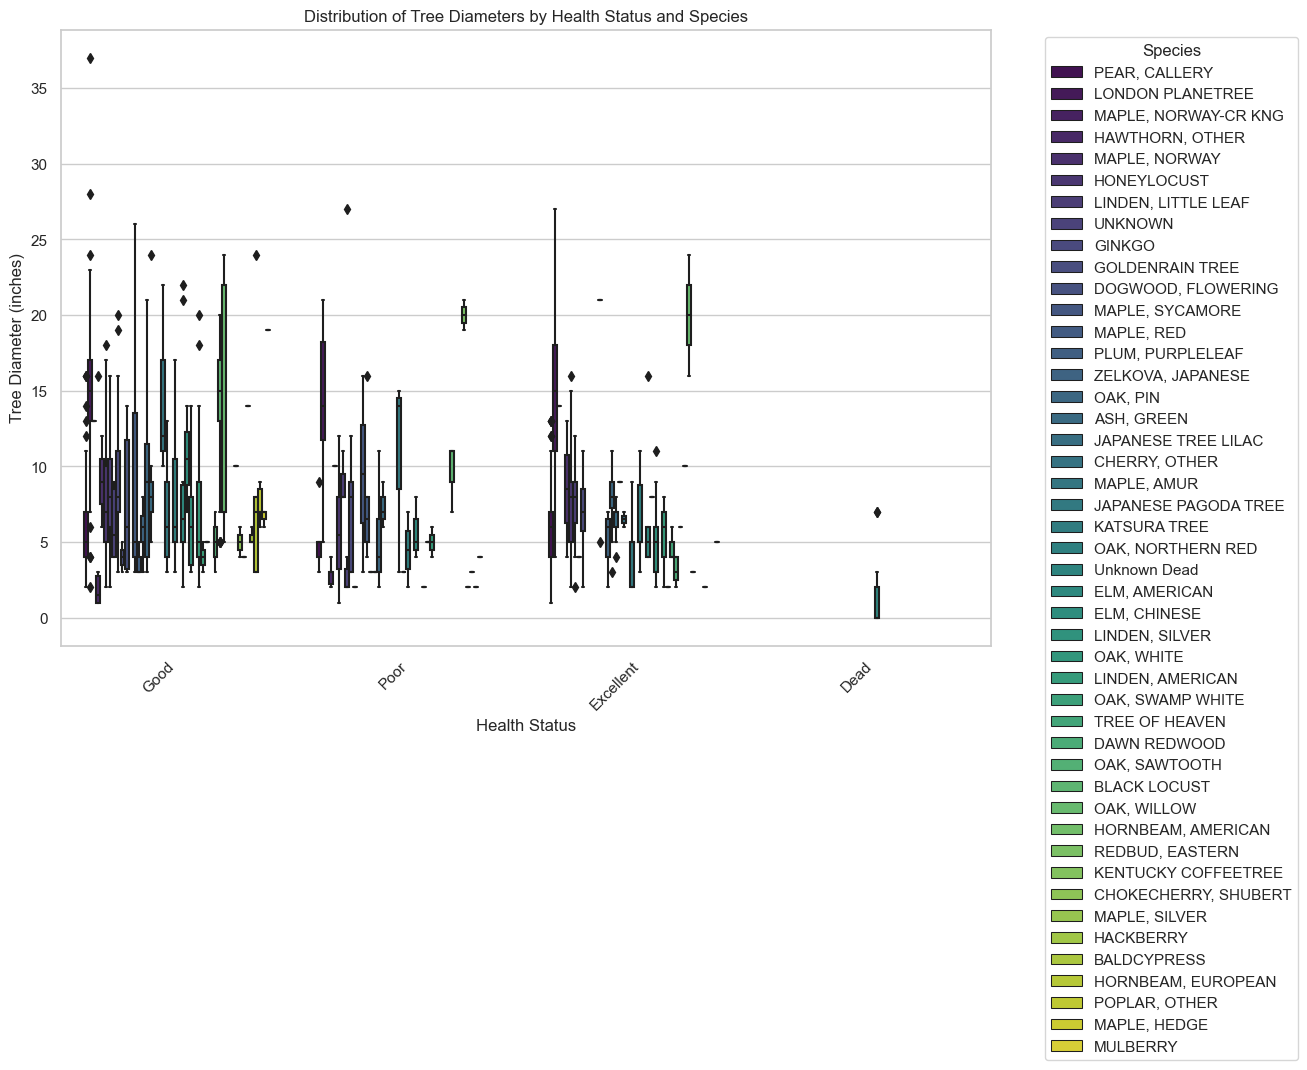

In [112]:
filtered_data = tree_data_2005.dropna(subset=['tree_dbh'])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='status', y='tree_dbh', hue='spc_common', data=filtered_data, palette='viridis')
plt.title('Distribution of Tree Diameters by Health Status and Species')
plt.xlabel('Health Status')
plt.ylabel('Tree Diameter (inches)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/gj/l2z223_j1gs10x35zxhy1n080000gn/T/ipykernel_63911/545769010.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='count', y='spc_common', hue='boroname', data=species_borough_counts, palette='viridis', ci=None)


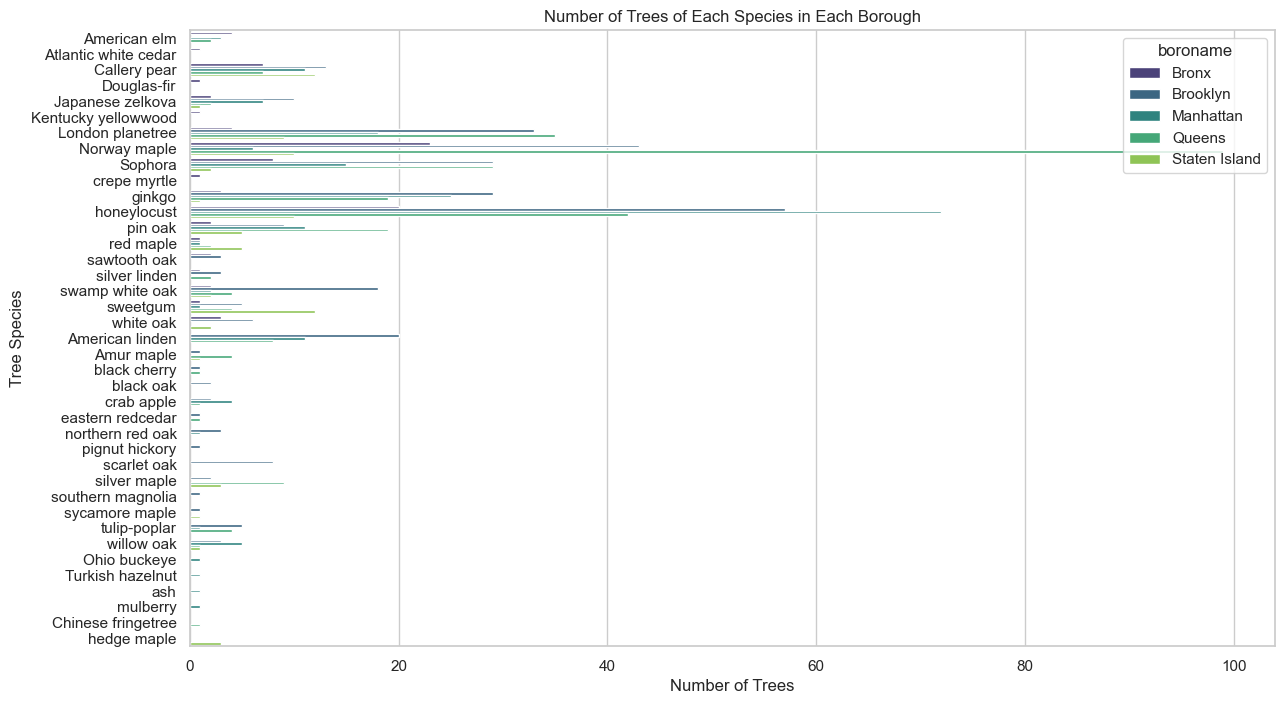

In [62]:
filtered_data = tree_data_2015.dropna(subset=['spc_common', 'boroname'])

species_borough_counts = filtered_data.groupby(['boroname', 'spc_common']).size().reset_index(name='count')

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='spc_common', hue='boroname', data=species_borough_counts, palette='viridis', ci=None)
plt.title('Number of Trees of Each Species in Each Borough')
plt.xlabel('Number of Trees')
plt.ylabel('Tree Species')
plt.show()

In [63]:
aq_data = pd.read_json('https://data.cityofnewyork.us/resource/c3uy-2p5r.json')

In [64]:
aq_data

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,2010-12-01T00:00:00.000,25.30
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,2008-12-01T00:00:00.000,26.93
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,2015-01-01T00:00:00.000,19.09
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,2015-01-01T00:00:00.000,19.76
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,2008-12-01T00:00:00.000,22.83
...,...,...,...,...,...,...,...,...,...,...,...
995,603061,375,Nitrogen dioxide (NO2),Mean,ppb,CD,401,Long Island City and Astoria (CD1),Winter 2017-18,2017-12-01T00:00:00.000,25.96
996,643675,375,Nitrogen dioxide (NO2),Mean,ppb,CD,401,Long Island City and Astoria (CD1),Annual Average 2019,2019-01-01T00:00:00.000,18.40
997,165764,375,Nitrogen dioxide (NO2),Mean,ppb,CD,302,Fort Greene and Brooklyn Heights (CD2),Winter 2008-09,2008-12-01T00:00:00.000,34.50
998,412698,375,Nitrogen dioxide (NO2),Mean,ppb,CD,202,Hunts Point and Longwood (CD2),Summer 2016,2016-06-01T00:00:00.000,15.53


In [75]:
aq_data.name.unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5'], dtype=object)

In [99]:
chem_group = aq_data.groupby('name')['geo_place_name'].mean().reset_index()


/var/folders/gj/l2z223_j1gs10x35zxhy1n080000gn/T/ipykernel_63911/4259621287.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chem_group = aq_data.groupby('name')['data_value', 'geo_place_name'].mean().reset_index()
/var/folders/gj/l2z223_j1gs10x35zxhy1n080000gn/T/ipykernel_63911/4259621287.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chem_group = aq_data.groupby('name')['data_value', 'geo_place_name'].mean().reset_index()


In [100]:
chem_group

,name,data_value
0,Asthma emergency department visits due to PM2.5,92.066000
1,Fine particles (PM 2.5),8.854985
2,Nitrogen dioxide (NO2),20.893560
3,Ozone (O3),27.551905


/var/folders/gj/l2z223_j1gs10x35zxhy1n080000gn/T/ipykernel_63911/1310461501.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = aq_data.groupby(['name', 'geo_place_name']).mean().reset_index()


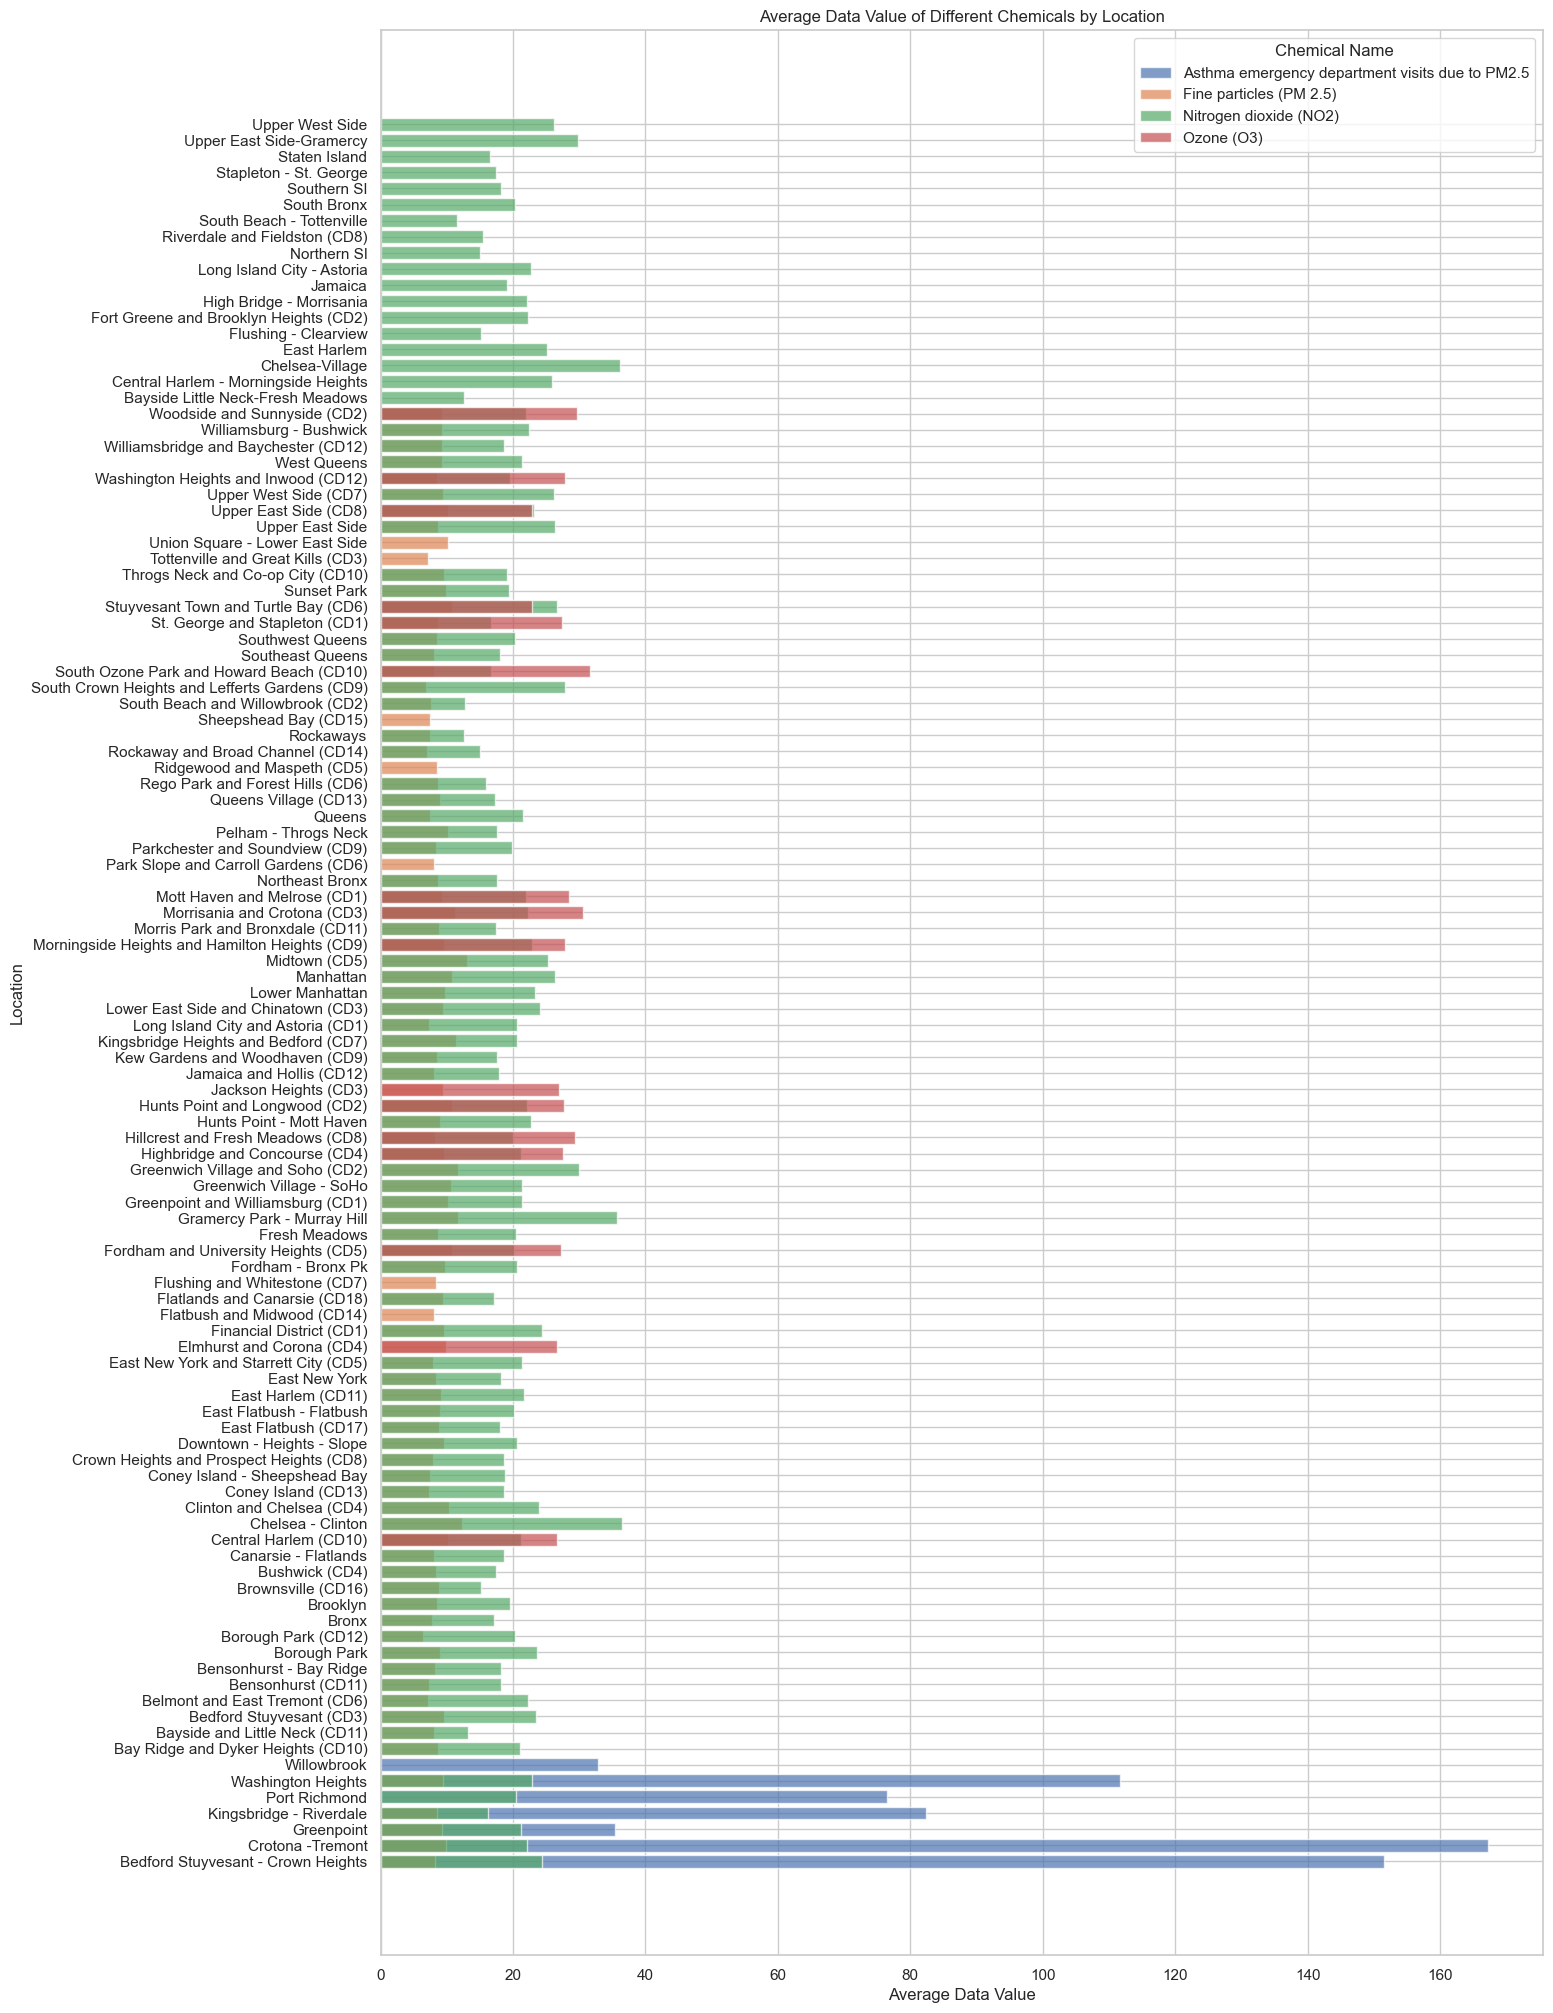

In [110]:
aq_data['start_date'] = pd.to_datetime(aq_data['start_date'])

grouped_data = aq_data.groupby(['name', 'geo_place_name']).mean().reset_index()

plt.figure(figsize=(15, 25))

for chemical in grouped_data['name'].unique():
    subset = grouped_data[grouped_data['name'] == chemical]
    plt.barh(subset['geo_place_name'], subset['data_value'], label=chemical, alpha=0.7)

# Customize the plot
plt.title('Average Data Value of Different Chemicals by Location')
plt.xlabel('Average Data Value')
plt.ylabel('Location')
plt.legend(title='Chemical Name')

# Show the plot
plt.show()

In [65]:
grouped_data = aq_data.groupby('geo_place_name')

for name, group in grouped_data:
    print(f"Location: {name}")
    print(group.head())
    print('\n')

Location: Bay Ridge and Dyker Heights (CD10)
    unique_id  indicator_id                    name measure measure_info  \
85     165890           375  Nitrogen dioxide (NO2)    Mean          ppb   
86     166657           375  Nitrogen dioxide (NO2)    Mean          ppb   
87     167778           375  Nitrogen dioxide (NO2)    Mean          ppb   
88     336822           375  Nitrogen dioxide (NO2)    Mean          ppb   
89     741225           375  Nitrogen dioxide (NO2)    Mean          ppb   

   geo_type_name  geo_join_id                      geo_place_name  \
85            CD          310  Bay Ridge and Dyker Heights (CD10)   
86            CD          310  Bay Ridge and Dyker Heights (CD10)   
87            CD          310  Bay Ridge and Dyker Heights (CD10)   
88            CD          310  Bay Ridge and Dyker Heights (CD10)   
89            CD          310  Bay Ridge and Dyker Heights (CD10)   

            time_period               start_date  data_value  
85       Winter 2010

In [66]:
grouped_data

In [68]:
mean_data_value_by_location = aq_data.groupby('geo_place_name')['data_value'].mean().reset_index()
print(mean_data_value_by_location)

                           geo_place_name  data_value
0      Bay Ridge and Dyker Heights (CD10)   18.155238
1       Bayside Little Neck-Fresh Meadows   12.530000
2          Bayside and Little Neck (CD11)    9.096000
3                Bedford Stuyvesant (CD3)   22.384615
4      Bedford Stuyvesant - Crown Heights   34.570588
..                                    ...         ...
104                           West Queens   19.757333
105  Williamsbridge and Baychester (CD12)   14.386364
106               Williamsburg - Bushwick   19.830000
107                           Willowbrook   32.800000
108          Woodside and Sunnyside (CD2)   18.627778

[109 rows x 2 columns]


In [69]:
mean_data_value_by_location

,geo_place_name,data_value
0,Bay Ridge and Dyker Heights (CD10),18.155238
1,Bayside Little Neck-Fresh Meadows,12.530000
2,Bayside and Little Neck (CD11),9.096000
3,Bedford Stuyvesant (CD3),22.384615
4,Bedford Stuyvesant - Crown Heights,34.570588
...,...,...
104,West Queens,19.757333
105,Williamsbridge and Baychester (CD12),14.386364
106,Williamsburg - Bushwick,19.830000
107,Willowbrook,32.800000


In [123]:
traffic_data = pd.read_json("https://data.cityofnewyork.us/resource/7ym2-wayt.json")

In [124]:
asthma_data = pd.read_csv('Asthma_and_the_Environment_data.csv')

In [125]:
asthma_data

,report_id,title,indicator_id,data_field_name,indicator_name,measure_name,display_type,start_date,end_date,time_type,time,geo_entity_id,geo_join_id,geo_type,neighborhood,data_value,message
0,78,Asthma and the Environment,31,Adul31,Adults with asthma (past 12 months),Age-adjusted percent,NaN,2003-01-01,2003-12-31,year,2003,101,101,UHF42,Kingsbridge - Riverdale,5.1,NaN
1,78,Asthma and the Environment,31,Adul31,Adults with asthma (past 12 months),Age-adjusted percent,NaN,2003-01-01,2003-12-31,year,2003,102,102,UHF42,Northeast Bronx,5.9,NaN
2,78,Asthma and the Environment,31,Adul31,Adults with asthma (past 12 months),Age-adjusted percent,NaN,2003-01-01,2003-12-31,year,2003,103,103,UHF42,Fordham - Bronx Pk,4.8,NaN
3,78,Asthma and the Environment,31,Adul31,Adults with asthma (past 12 months),Age-adjusted percent,NaN,2003-01-01,2003-12-31,year,2003,104,104,UHF42,Pelham - Throgs Neck,6.1,NaN
4,78,Asthma and the Environment,31,Adul31,Adults with asthma (past 12 months),Age-adjusted percent,NaN,2003-01-01,2003-12-31,year,2003,105,105,UHF42,Crotona -Tremont,8.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,78,Asthma and the Environment,1248,Rent1248,Renter-occupied homes with any health-related ...,Percent,NaN,2017-01-01,2017-12-31,year,2017,410,410,UHF42,Rockaways,71.5,NaN
7850,78,Asthma and the Environment,1248,Rent1248,Renter-occupied homes with any health-related ...,Percent,NaN,2017-01-01,2017-12-31,year,2017,501,501,UHF42,Port Richmond,46.9,Estimate is based on small numbers so should b...
7851,78,Asthma and the Environment,1248,Rent1248,Renter-occupied homes with any health-related ...,Percent,NaN,2017-01-01,2017-12-31,year,2017,502,502,UHF42,Stapleton - St. George,38.0,Estimate is based on small numbers so should b...
7852,78,Asthma and the Environment,1248,Rent1248,Renter-occupied homes with any health-related ...,Percent,NaN,2017-01-01,2017-12-31,year,2017,503,503,UHF42,Willowbrook,28.9,Estimate is based on small numbers so should b...


In [126]:
asthma_data['indicator_name'].unique()

array(['Adults with asthma (past 12 months)', 'Secondhand smoke at home',
       'Homes with cracks or holes', 'Homes with leaks',
       'Neighborhood poverty', 'Homes with cockroaches',
       'No smoke-free home policy', 'Fine particles (PM 2.5)',
       'Ozone (O3)', 'Adults reporting mice or rats inside',
       'Asthma emergency department visits due to PM2.5',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Asthma emergency departments visits due to Ozone',
       'Asthma hospitalizations due to Ozone',
       'Health insurance (adults)',
       'Asthma in public school children (age 5 to 14)',
       'Asthma emergency department visits (age 5 to 17)',
       'Asthma emergency department visits (adults)',
       'Asthma hospitalizations (age 5 to 17)',
       'Asthma hospitalizations (adults)',
       'Renter-occupied homes with any health-related maintenance problems'],
      dtype=object)

In [127]:
asthma_data.groupby('indicator_name')['data_value'].mean()

indicator_name
Adults reporting mice or rats inside                                   14.802439
Adults with asthma (past 12 months)                                     4.770279
Asthma emergency department visits (adults)                           101.245068
Asthma emergency department visits (age 5 to 17)                      177.504444
Asthma emergency department visits due to PM2.5                        71.303020
Asthma emergency departments visits due to Ozone                       74.456250
Asthma hospitalizations (adults)                                       21.844218
Asthma hospitalizations (age 5 to 17)                                  25.269600
Asthma hospitalizations due to Ozone                                   13.030357
Asthma in public school children (age 5 to 14)                         64.453571
Cardiovascular hospitalizations due to PM2.5 (age 40+)                 18.571781
Fine particles (PM 2.5)                                                 8.447956
Health insura

In [137]:
air_and_health = pd.read_csv("Outdoor_Air_and_Health_data.csv")

In [138]:
air_and_health

,report_id,title,indicator_id,data_field_name,indicator_name,measure_name,display_type,start_date,end_date,time_type,time,geo_entity_id,geo_join_id,geo_type,neighborhood,data_value,message
0,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,101,101,UHF42,Kingsbridge - Riverdale,11.03,NaN
1,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,102,102,UHF42,Northeast Bronx,10.68,NaN
2,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,103,103,UHF42,Fordham - Bronx Pk,11.10,NaN
3,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,104,104,UHF42,Pelham - Throgs Neck,10.59,NaN
4,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,105,105,UHF42,Crotona -Tremont,11.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,77,Outdoor Air and Health,661,O3-A661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,410,410,UHF42,Rockaways,4.80,NaN
4280,77,Outdoor Air and Health,661,O3-A661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,501,501,UHF42,Port Richmond,7.70,NaN
4281,77,Outdoor Air and Health,661,O3-A661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,502,502,UHF42,Stapleton - St. George,5.70,NaN
4282,77,Outdoor Air and Health,661,O3-A661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,503,503,UHF42,Willowbrook,2.60,NaN


In [139]:
air_and_health['indicator_name'].unique()

array(['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)',
       'Deaths due to PM2.5', 'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Annual vehicle miles traveled',
       'Annual vehicle miles traveled (cars)',
       'Annual vehicle miles traveled (trucks)',
       'Outdoor Air Toxics - Benzene',
       'Outdoor Air Toxics - Formaldehyde',
       'Asthma emergency department visits due to PM2.5',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Cardiac and respiratory deaths due to Ozone',
       'Asthma emergency departments visits due to Ozone',
       'Asthma hospitalizations due to Ozone'], dtype=object)

In [143]:
pm25_data = air_and_health[air_and_health['indicator_name'] == 'Fine particles (PM 2.5)']

In [161]:
pm25_data

,report_id,title,indicator_id,data_field_name,indicator_name,measure_name,display_type,start_date,end_date,time_type,time,geo_entity_id,geo_join_id,geo_type,neighborhood,data_value,message
0,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,101,101,UHF42,Kingsbridge - Riverdale,11.030000,NaN
1,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,102,102,UHF42,Northeast Bronx,10.680000,NaN
2,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,103,103,UHF42,Fordham - Bronx Pk,11.100000,NaN
3,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,104,104,UHF42,Pelham - Throgs Neck,10.590000,NaN
4,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2008-12-01,2009-12-01,Annual Average,Annual Average 2009,105,105,UHF42,Crotona -Tremont,11.760000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2022-01-01,2022-12-31,Annual Average,Annual Average 2022,410,410,UHF42,Rockaways,5.027691,NaN
584,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2022-01-01,2022-12-31,Annual Average,Annual Average 2022,501,501,UHF42,Port Richmond,5.502311,NaN
585,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2022-01-01,2022-12-31,Annual Average,Annual Average 2022,502,502,UHF42,Stapleton - St. George,5.306276,NaN
586,77,Outdoor Air and Health,365,Fine365,Fine particles (PM 2.5),Mean,mcg/m3,2022-01-01,2022-12-31,Annual Average,Annual Average 2022,503,503,UHF42,Willowbrook,5.233294,NaN


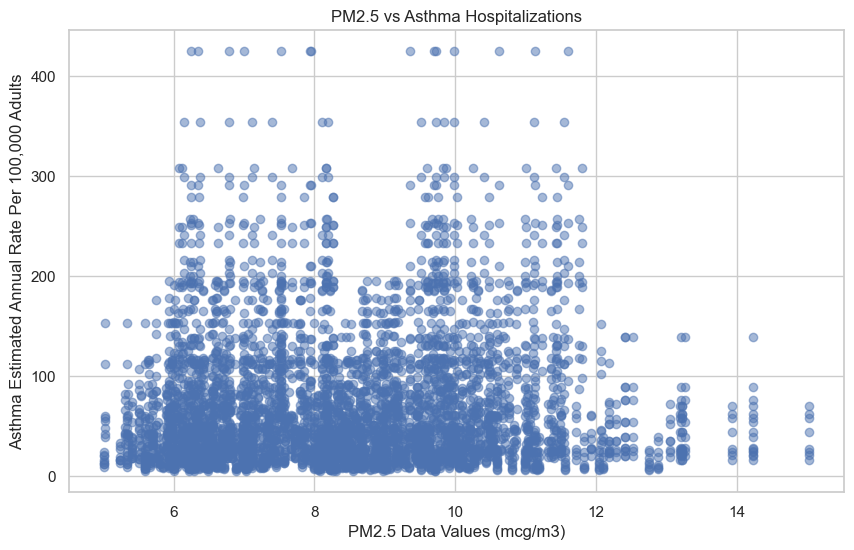

In [167]:
asthma_data = air_and_health[air_and_health['indicator_name'] == 'Asthma emergency department visits due to PM2.5']

merged_data = pd.merge(pm25_data, asthma_data, on=['geo_entity_id'])
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['data_value_x'], merged_data['data_value_y'], alpha=0.5)
plt.title('PM2.5 vs Asthma Hospitalizations')
plt.xlabel('PM2.5 Data Values (mcg/m3)')
plt.ylabel('Asthma Estimated Annual Rate Per 100,000 Adults')
plt.grid(True)
plt.show()



In [165]:
asthma_data

,report_id,title,indicator_id,data_field_name,indicator_name,measure_name,display_type,start_date,end_date,time_type,time,geo_entity_id,geo_join_id,geo_type,neighborhood,data_value,message
2772,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,101,101,UHF42,Kingsbridge - Riverdale,88.3,NaN
2773,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,102,102,UHF42,Northeast Bronx,152.6,NaN
2774,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,103,103,UHF42,Fordham - Bronx Pk,167.2,NaN
2775,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,104,104,UHF42,Pelham - Throgs Neck,162.5,NaN
2776,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,105,105,UHF42,Crotona -Tremont,257.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,77,Outdoor Air and Health,657,PM2-657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,410,410,UHF42,Rockaways,39.0,NaN
3944,77,Outdoor Air and Health,657,PM2-657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,501,501,UHF42,Port Richmond,45.6,NaN
3945,77,Outdoor Air and Health,657,PM2-657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,502,502,UHF42,Stapleton - St. George,32.0,NaN
3946,77,Outdoor Air and Health,657,PM2-657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,503,503,UHF42,Willowbrook,12.9,NaN


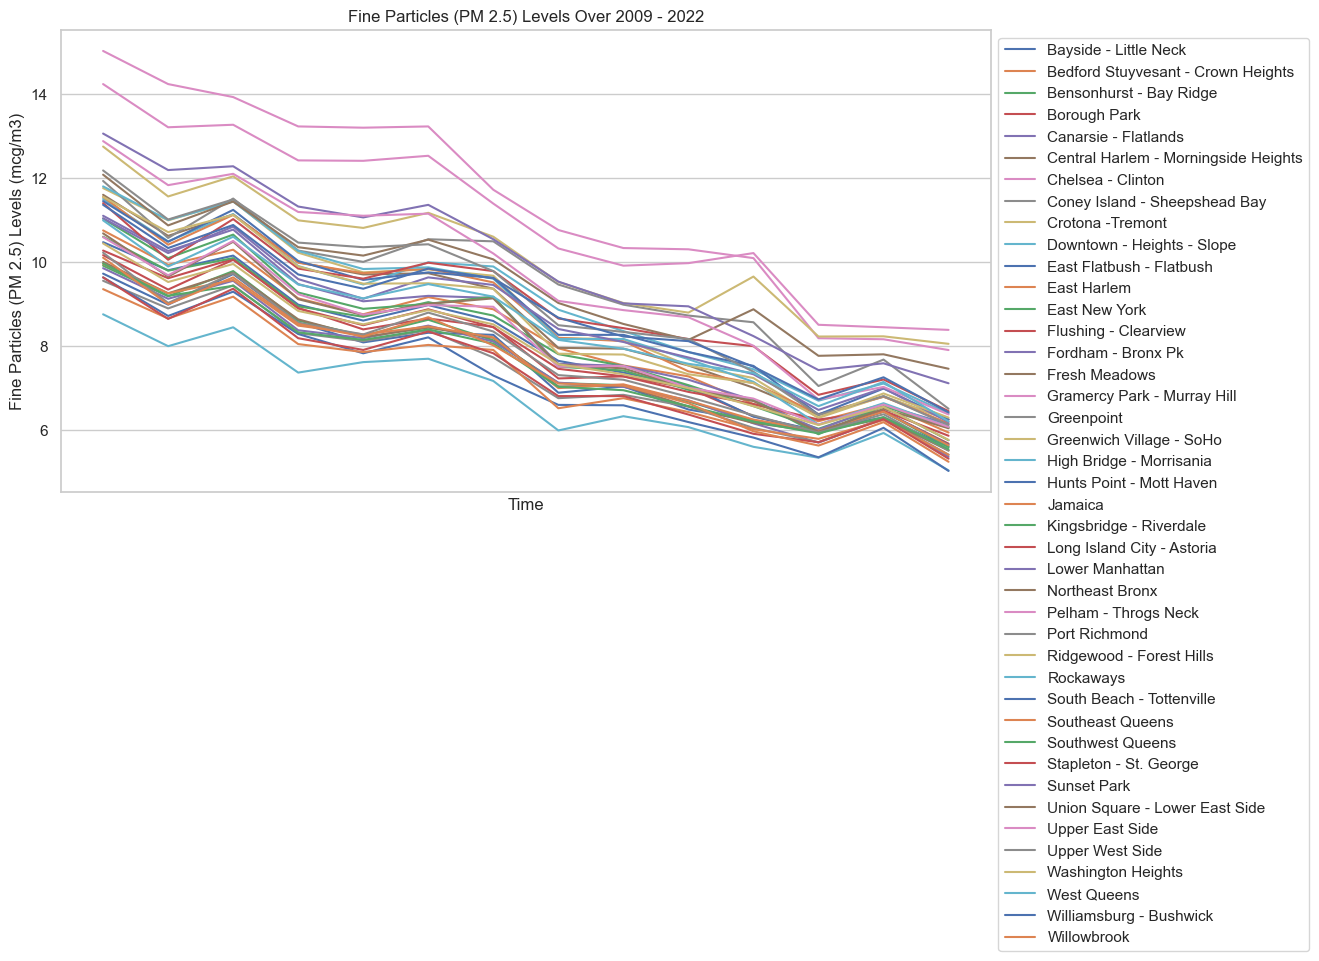

In [149]:
plt.figure(figsize=(12, 6))
for neighborhood, data in pm25_data.groupby('neighborhood'):
    plt.plot(data['time'], data['data_value'], label=neighborhood)

plt.xlabel('Time')
plt.ylabel('Fine Particles (PM 2.5) Levels (mcg/m3)')
plt.title('Fine Particles (PM 2.5) Levels Over 2009 - 2022')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks([])

plt.show()


In [151]:
asthma_hosp = air_and_health[air_and_health['indicator_name'] == 'Asthma emergency department visits due to PM2.5']

In [152]:
asthma_hosp

,report_id,title,indicator_id,data_field_name,indicator_name,measure_name,display_type,start_date,end_date,time_type,time,geo_entity_id,geo_join_id,geo_type,neighborhood,data_value,message
2772,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,101,101,UHF42,Kingsbridge - Riverdale,88.3,NaN
2773,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,102,102,UHF42,Northeast Bronx,152.6,NaN
2774,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,103,103,UHF42,Fordham - Bronx Pk,167.2,NaN
2775,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,104,104,UHF42,Pelham - Throgs Neck,162.5,NaN
2776,77,Outdoor Air and Health,648,PM2-648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",2005-01-01,2007-12-31,other,2005-2007,105,105,UHF42,Crotona -Tremont,257.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,77,Outdoor Air and Health,657,PM2-657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,410,410,UHF42,Rockaways,39.0,NaN
3944,77,Outdoor Air and Health,657,PM2-657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,501,501,UHF42,Port Richmond,45.6,NaN
3945,77,Outdoor Air and Health,657,PM2-657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,502,502,UHF42,Stapleton - St. George,32.0,NaN
3946,77,Outdoor Air and Health,657,PM2-657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",2015-01-01,2017-12-31,year,2015-2017,503,503,UHF42,Willowbrook,12.9,NaN
